# WeatherPy - Tyler Hill

In [92]:
import pandas as pd
import requests
import json
import random
import matplotlib.pyplot as plt
from scipy import stats
from pprint import pprint
from api_keys import weather_api_key
from citipy import citipy

In [93]:
# https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}

In [94]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Create lists to store values from for-loop
lats = []
longs = []
cities = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Declare number of samples to calculate
num_samples = 10

for x in range(num_samples):
    
    # Randomly generate Latitude and Longitude, append values
    lat = random.uniform(-90,90)
    lats.append(lat)
    long = random.uniform(-180,180)
    longs.append(long)
    
    # Grab nearest city from Lat + Lon, then append 'cities' list
    city = citipy.nearest_city(lat, long)
    f_city = city.city_name.title()
    f_country = city.country_code.upper()
    cities.append(f'{f_city}, {f_country}')
    
    # Print cities as they're queried
    print(f'{f_city}, {f_country}')
    
    # Build query URL to pull weather data from OpenWeatherMap API using Lat + Lon
    q_url = f'{url}lat={lat}&lon={long}&units={units}&APPID={weather_api_key}'
    response = requests.get(q_url).json()
    
    # Pull relevant data from API calls, declaring a value to be appended
    temp = response["main"]["temp"]
    humid = response["main"]["humidity"]
    cloud = response["clouds"]["all"]
    wind = response["wind"]["speed"]
    
    # Append values to lists
    temperature.append(temp)
    humidity.append(humid)
    cloudiness.append(cloud)
    wind_speed.append(wind)

# Build dataframe from collected values
df = pd.DataFrame({
    "Latitude": lats,
    "Longitude": longs,
    "City": cities,
    "Temperature": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
})

# Display dataframe
df.head()

Vuktyl, RU
La Ronge, CA
West Wendover, US
Lasa, CN
San Patricio, MX
Lamu, KE
Fairbanks, US
Labutta, MM
Najran, SA
Ayr, AU


,Latitude,Longitude,City,Temperature,Humidity,Cloudiness,Wind Speed
0,63.897377,58.291020,"Vuktyl, RU",16.05,80,98,7.87
1,62.672202,-105.577950,"La Ronge, CA",16.66,95,86,6.24
2,40.630281,-114.568663,"West Wendover, US",43.43,56,97,11.36
3,33.123268,91.935367,"Lasa, CN",33.98,27,55,10.11
4,2.330410,-117.309485,"San Patricio, MX",78.55,79,22,12.91


In [95]:
# Write DataFrame to csv
output_file = "Output/WeatherPy.csv"
df.to_csv(output_file,index=False, header=True)

In [96]:
# Declare column values for ease of use
lats = df["Latitude"]
longs = df["Longitude"]
temps = df["Temperature"]
humids = df["Humidity"]
clouds = df["Cloudiness"]
winds = df["Wind Speed"]

In [97]:
# Determine max and min values to determine xlim for each plot
temp_min = temps.min()
temp_max = temps.max()

humid_min = humids.min()
humid_max = humids.max()

cloud_min = clouds.min()
cloud_max = clouds.max()

wind_min = winds.min()
wind_max = winds.max()

# Scatter Plots

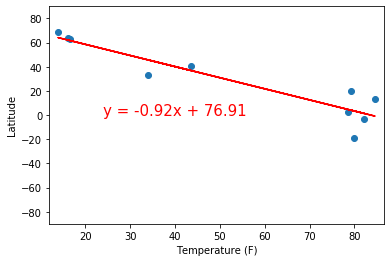

In [98]:
# Temp vs. Latitude
plt.scatter(temps, lats)
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlim(temp_min-2, temp_max+2)

slope, int, r, p, std_err = stats.linregress(temps, lats)
y = slope * temps + int
plt.plot(temps,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(temp_min+10,0),fontsize=15,color="red")

plt.savefig("Output/Images/temp_vs_lat.png")

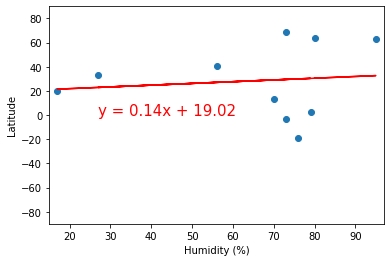

In [99]:
# Humidity vs. Latitude
plt.scatter(humids, lats)
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlim(humid_min-2,humid_max+2)

slope, int, r, p, std_err = stats.linregress(humids, lats)
y = slope * humids + int
plt.plot(humids,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(humid_min+10,0),fontsize=15,color="red")

plt.savefig("Output/humid_vs_lat.png")

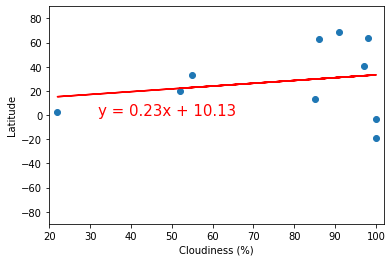

In [100]:
# Cloudiness vs. Latitude
plt.scatter(clouds, lats)
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlim(cloud_min-2, cloud_max+2)

slope, int, r, p, std_err = stats.linregress(clouds, lats)
y = slope * clouds + int
plt.plot(clouds,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(cloud_min+10,0),fontsize=15,color="red")

plt.savefig("Output/cloud_vs_lat.png")

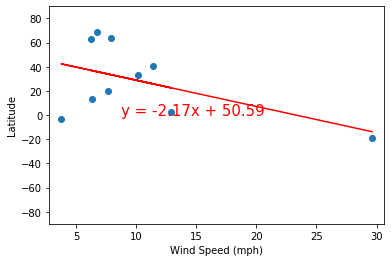

In [101]:
# Wind speed vs. Latitude
plt.scatter(winds, lats)
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlim(wind_min-1, wind_max+1)

slope, int, r, p, std_err = stats.linregress(winds, lats)
y = slope * winds + int
plt.plot(winds,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(wind_min+5,0),fontsize=15,color="red")

plt.savefig("Output/windspeed_vs_lat.png")

# Separate values into Northern and Southern Hemispheres

In [66]:
hemisphere = []
for index, row in df.iterrows():
    lat = row["Latitude"]
    if lat >= 0:
        hem = "Northern"
        hemisphere.append(hem)
    elif lat < 0:
        hem = "Southern"
        hemisphere.append(hem)
df["Hemisphere"] = hemisphere
df.head()

,Latitude,Longitude,City,Temperature,Humidity,Cloudiness,Wind Speed,Hemisphere
0,-42.793305,-48.047944,"Rocha, UY",60.58,83,100,12.26,Southern
1,-28.473302,-139.486571,"Rikitea, PF",68.56,66,23,17.02,Southern
2,80.452499,154.747519,"Chokurdakh, RU",2.59,93,100,13.80,Northern
3,47.389406,65.535960,"Zhezkazgan, KZ",66.61,29,97,8.37,Northern
4,82.994413,116.554702,"Saskylakh, RU",1.98,94,100,6.93,Northern


In [67]:
n_hem = df.loc[(df["Hemisphere"]) == "Northern"]
s_hem = df.loc[(df["Hemisphere"]) == "Southern"]

In [68]:
n_lats = n_hem["Latitude"]
s_lats = s_hem["Latitude"]
n_longs = n_hem["Longitude"]
s_longs = s_hem["Longitude"]
n_temps = n_hem["Temperature"]
s_temps = s_hem["Temperature"]
n_humids = n_hem["Humidity"]
s_humids = s_hem["Humidity"]
n_clouds = n_hem["Cloudiness"]
s_clouds = s_hem["Cloudiness"]
n_winds = n_hem["Wind Speed"]
s_winds = s_hem["Wind Speed"]

In [69]:
min_n_temps = n_temps.min()
max_n_temps = n_temps.max()
min_s_temps = s_temps.min()
max_s_temps = s_temps.max()

min_n_humids = n_humids.min()
max_n_humids = n_humids.max()
min_s_humids = s_humids.min()
max_s_humids = s_humids.max()

min_n_clouds = n_clouds.min()
max_n_clouds = n_clouds.max()
min_s_clouds = s_clouds.min()
max_s_clouds = s_clouds.max()

min_n_winds = n_winds.min()
max_n_winds = n_winds.max()
min_s_winds = s_winds.min()
max_s_winds = s_winds.max()

Text(0, 30, 'y = -0.6x + 82.23')

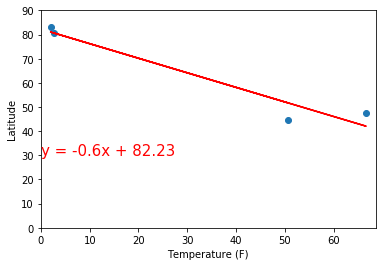

In [70]:
# Temp vs. Latitude # Northern Hemisphere
plt.scatter(n_temps, n_lats)
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.ylim(0,90)
plt.xlim(min_n_temps-2, max_n_temps+2)

slope, int, r, p, std_err = stats.linregress(n_temps, n_lats)
y = slope * n_temps + int
plt.plot(n_temps,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(0,30),fontsize=15,color="red")

Text(-50, -30, 'y = 0.53x + -68.67')

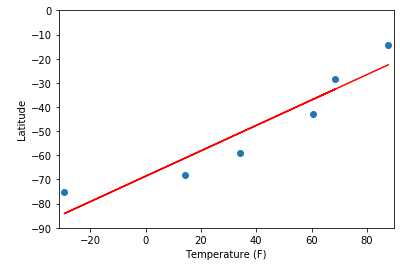

In [71]:
# Temp vs. Latitude # Southern Hemisphere
plt.scatter(s_temps, s_lats)
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.ylim(-90,0)
plt.xlim(min_s_temps-2, max_s_temps+2)

slope, int, r, p, std_err = stats.linregress(s_temps, s_lats)
y = slope * s_temps + int
plt.plot(s_temps,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(-50,-30),fontsize=15,color="red")

Text(55, 80, 'y = 0.56x + 29.57')

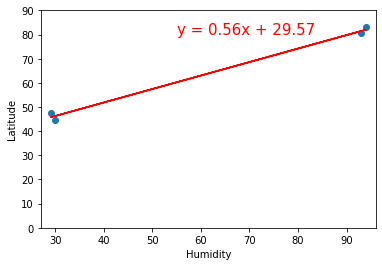

In [72]:
# Humidity vs. Latitude # Northern Hemisphere
plt.scatter(n_humids, n_lats)
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.ylim(0,90)
plt.xlim(min_n_humids-2, max_n_humids+2)

slope, int, r, p, std_err = stats.linregress(n_humids, n_lats)
y = slope * n_humids + int
plt.plot(n_humids,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(55,80),fontsize=15,color="red")

Text(60, -60, 'y = -1.34x + 53.31')

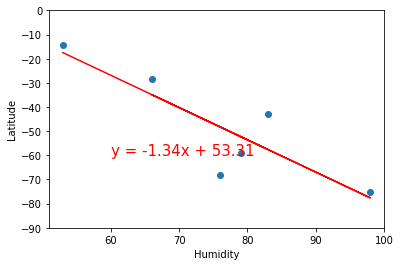

In [73]:
# Humidity vs. Latitude # Southern Hemisphere
plt.scatter(s_humids, s_lats)
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.ylim(-90,0)
plt.xlim(min_s_humids-2, max_s_humids+2)

slope, int, r, p, std_err = stats.linregress(s_humids, s_lats)
y = slope * s_humids + int
plt.plot(s_humids,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(60,-60),fontsize=15,color="red")

Text(20, 30, 'y = 0.61x + 10.14')

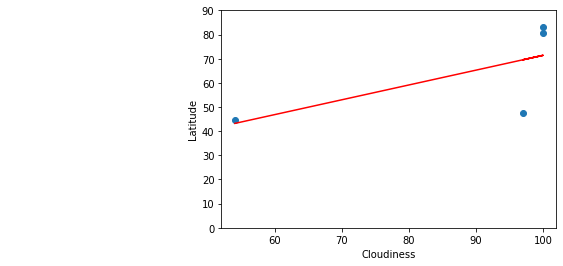

In [74]:
# Cloudiness vs. Latitude # Northern Hemisphere
plt.scatter(n_clouds, n_lats)
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.ylim(0,90)
plt.xlim(min_n_clouds-2, max_n_clouds+2)

slope, int, r, p, std_err = stats.linregress(n_clouds, n_lats)
y = slope * n_clouds + int
plt.plot(n_clouds,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(20,30),fontsize=15,color="red")

Text(20, -70, 'y = -0.29x + -30.36')

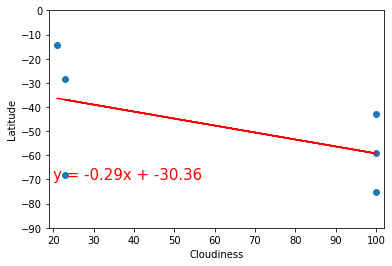

In [75]:
# Cloudiness vs. Latitude # Southern Hemisphere
plt.scatter(s_clouds, s_lats)
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.ylim(-90,0)
plt.xlim(min_s_clouds-2, max_s_clouds+2)

slope, int, r, p, std_err = stats.linregress(s_clouds, s_lats)
y = slope * s_clouds + int
plt.plot(s_clouds,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(20,-70),fontsize=15,color="red")

Text(12, 20, 'y = -1.2x + 76.82')

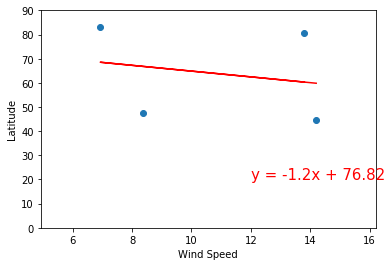

In [76]:
# Wind Speed vs. Latitude # Northern Hemisphere
plt.scatter(n_winds, n_lats)
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.ylim(0,90)
plt.xlim(min_n_winds-2, max_n_winds+2)

slope, int, r, p, std_err = stats.linregress(n_winds, n_lats)
y = slope * n_winds + int
plt.plot(n_winds,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(12,20),fontsize=15,color="red")

Text(20, -70, 'y = -1.89x + -21.43')

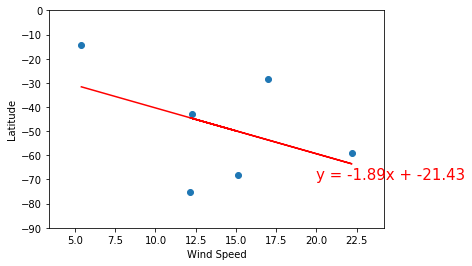

In [77]:
# Wind Speed vs. Latitude # Southern Hemisphere
plt.scatter(s_winds, s_lats)
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.ylim(-90,0)
plt.xlim(min_s_winds-2, max_s_winds+2)

slope, int, r, p, std_err = stats.linregress(s_winds, s_lats)
y = slope * s_winds + int
plt.plot(s_winds,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(20,-70),fontsize=15,color="red")